### Telecom X - An√°lise de Evas√£o de Clientes.
##### A empresa enfrenta um alto √≠ndice de cancelamentos e precisa entender os fatores que levam √† perda de clientes.  
##### Neste projeto, realizamos a extra√ß√£o, tratamento e carga dos dados (ETL), al√©m de uma an√°lise explorat√≥ria para identificar 
##### padr√µes e perfis associados √† evas√£o.  

##### O objetivo do projeto √© oferecer **insights acion√°veis** que ajudem a empresa a reduzir o churn e fidelizar sua base de clientes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Extra√ß√£o e Normaliza√ß√£o dos Dados

##### Os dados foram fornecidos no formato JSON com estrutura aninhada. Algumas colunas, como `customer`, `account`, `internet`, entre outras, continham subcampos em formato de dicion√°rio.

##### Para facilitar a an√°lise, se fez necess√°ria a **normaliza√ß√£o** desses campos, transformando-os em colunas planas utilizando `pd.json_normalize()`. Isso nos permitiu acessar diretamente atributos como `customer_Tenure`, `account_Contract`, `internet_OnlineSecurity`, entre outros.

#### Exemplo de transforma√ß√£o:
##### antes: json {"customer": {'gender': 'Female', 'SeniorCitizen': 0,}}



In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)

df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [3]:
df = pd.concat([
    df.drop(['customer', 'phone', 'internet', 'account'], axis=1), #excluir as colunas agrupadas
    pd.json_normalize(df['customer']).add_prefix('customer_'),     #normalizar a coluna customer, mantendo o prefixo "cutomer_"
    pd.json_normalize(df['phone']).add_prefix('phone_'),           #normalizar a coluna phone, mantendo o prefixo "phone_"
    pd.json_normalize(df['internet']).add_prefix('internet_'),     #normalizar a coluna internet, mantendo o prefixo "internet_"
    pd.json_normalize(df['account']).add_prefix('account_'),       #normalizar a coluna account, mantendo o prefixo "account_"
], axis=1)

df.head()

customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... internet_OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account_PaymentMethod account_Charges.Monthly  account_Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

#### Tratamento e sele√ß√£o das vari√°veis relevantes

##### Para a an√°lise da evas√£o de clientes (churn), algumas colunas do DataFrame se mostram especialmente relevantes com base no contexto de neg√≥cio e em hip√≥teses iniciais:

##### - **`Churn`** ‚Äî Esta √© a vari√°vel-alvo. √â a partir dela que entenderemos quais perfis est√£o mais associados ao cancelamento do servi√ßo.
##### - **`customer_tenure`** ‚Äî Representa o tempo de perman√™ncia do cliente. Perman√™ncias curtas costumam estar associadas a maior probabilidade de churn.
##### - **`account_Contract`** ‚Äî Clientes com contratos mensais tendem a ter maior risco de cancelamento, pois n√£o est√£o fidelizados por longo prazo.
##### - **`account_Charges.Monthly`** ‚Äî Clientes com mensalidades mais altas podem ter expectativas maiores em rela√ß√£o ao servi√ßo, o que pode influenciar sua decis√£o de cancelar.
##### - **`account_Charges.Total`** ‚Äî O valor total pago ao longo do tempo ajuda a identificar clientes antigos que mesmo assim decidem sair ‚Äî isso pode indicar uma queda de satisfa√ß√£o ao longo do tempo.
##### - **`internet_*` (todas as colunas)** ‚Äî O tipo de servi√ßo contratado (e servi√ßos adicionais como seguran√ßa ou backup) afeta a percep√ß√£o de valor. A aus√™ncia desses adicionais pode ser um sinal de risco.
##### - **`account_PaymentMethod`** ‚Äî M√©todos de pagamento autom√°ticos tendem a reduzir o churn, possivelmente por eliminar barreiras no processo de pagamento.
##### - **`phone_PhoneService`** ‚Äî A presen√ßa ou n√£o de telefone fixo pode refletir diferentes perfis demogr√°ficos, como clientes mais jovens ou mais antigos.
##### - **`customer_gender`** ‚Äî Pode haver varia√ß√µes no churn entre homens e mulheres, mas a expectativa √© de que n√£o seja um fator preditivo forte. Ainda assim, ser√° analisado.

#### Verificando se existem valores duplicados em `Customer ID`

In [5]:
df['customerID'].is_unique

True

##### A exist√™ncia de valores duplicados na coluna `customer_ID` poderia indicar registros repetidos para o mesmo cliente ‚Äî algo que comprometeria a an√°lise.

##### Nenhuma duplicata foi encontrada, o que garante que cada linha representa um cliente √∫nico.

#### Checando a integridade de valores na coluna `Churn`

In [6]:
(df['Churn'].str.strip() == '').sum() #descobrindo quantas linhas est√£o vazias.

224

In [7]:
empty_lines = df[df['Churn'].str.strip() == '']

empty_lines

customerID Churn customer_gender  customer_SeniorCitizen  \
30    0047-ZHDTW                Female                       0   
75    0120-YZLQA                  Male                       0   
96    0154-QYHJU                  Male                       0   
98    0162-RZGMZ                Female                       1   
175   0274-VVQOQ                  Male                       1   
...          ...   ...             ...                     ...   
7158  9840-GSRFX                Female                       0   
7180  9872-RZQQB                Female                       0   
7211  9920-GNDMB                  Male                       0   
7239  9955-RVWSC                Female                       0   
7247  9966-VYRTZ                Female                       0   

     customer_Partner customer_Dependents  customer_tenure phone_PhoneService  \
30                 No                  No               11                Yes   
75                 No                  No               71                Yes   
96                 No                  No               29                Yes   
98                 No                  No                5                Yes   
175               Yes                  No               65                Yes   
...               ...                 ...              ...                ...   
7158               No                  No               14                Yes   
7180              Yes                  No               49                 No   
7211               No                  No                9                Yes   
7239              Yes                 Yes               67                Yes   
7247              Yes                 Yes               31                Yes   

     phone_MultipleLines internet_InternetService  ... internet_OnlineBackup  \
30                   Yes              Fiber optic  ...                    No   
75                    No                       No  ...   No internet service   
96                    No                      DSL  ...                   Yes   
98                    No                      DSL  ...                   Yes   
175                  Yes              Fiber optic  ...                   Yes   
...                  ...                      ...  ...                   ...   
7158                 Yes                      DSL  ...                   Yes   
7180    No phone service                      DSL  ...                    No   
7211                 Yes              Fiber optic  ...                    No   
7239                  No                       No  ...   No internet service   
7247                  No                       No  ...   No internet service   

     internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
30                          No                   No                   No   
75         No internet service  No internet service  No internet service   
96                          No                  Yes                   No   
98                          No                  Yes                   No   
175                        Yes                   No                  Yes   
...                        ...                  ...                  ...   
7158                        No                   No                   No   
7180                        No                   No                  Yes   
7211                        No                   No                   No   
7239       No internet service  No internet service  No internet service   
7247       No internet service  No internet service  No internet service   

     internet_StreamingMovies account_Contract account_PaperlessBilling  \
30                         No   Month-to-month                      Yes   
75        No internet service         Two year                      Yes   
96                         No         One year                      Yes   
98                         No   Month-to-month                    

In [8]:
nulls = df['Churn'].isna().sum()
empty = (df['Churn'].astype(str).str.strip() == '').sum()
df_len = len(df)

percent = ((nulls + empty)/ df_len) * 100

print(f"Linhas com valores ausentes em 'Churn': {nulls + empty}")
print(f"Representando {percent:.2f}% do Total de linhas")


Linhas com valores ausentes em 'Churn': 224
Representando 3.08% do Total de linhas


In [9]:
df = df[df['Churn'].notna()] #remove as linhas onde os valores s√£o nulos em Nan (ainda que a ferramenta indique que n√£o existem).
df = df[df['Churn'].str.strip() != ''] #remove as linhas sem valor.

(df['Churn'].str.strip() == '').sum() #checando se totdos os valores vazios foram extra√≠dos.

0

#### Tratamento de valores ausentes na coluna `Churn`

##### Durante a an√°lise explorat√≥ria, foi identificada a aus√™ncia de **224 valores** na coluna, o que representa aproximadamente **3,08% do total de registros**.

##### Essa aus√™ncia √© inesperada**, pois esta √© a vari√°vel-alvo da an√°lise, ela que indica se o cliente rescindiu ou n√£o o contrato com a empresa.

##### Por se tratar de uma **informa√ß√£o factual** (ou seja, o cliente efetivamente cancelou ou n√£o), n√£o √© poss√≠vel inferir ou imputar esses valores de forma segura.

##### **Decis√£o**: as linhas com valores ausentes em `Churn` foram **removidas do DataFrame**, garantindo que a an√°lise seja baseada apenas em registros com informa√ß√£o completa sobre evas√£o.


#### Checando valores nulos ou ausentes nas outras colunas que utilizarei.

In [10]:
df['customer_tenure'].isna().sum()

0

In [11]:
(df['account_Contract'].str.strip() == '').sum()

0

In [12]:
df['account_Charges.Monthly'].isna().sum()

0

In [13]:
(df['account_Charges.Monthly'] == 0.00).sum() #verificando se existe algum valor contratado igual a 0 no data frame

0

In [17]:
(df['internet_InternetService'].str.strip() == '').sum()

0

In [18]:
(df['internet_OnlineSecurity'].str.strip() == '').sum()

0

In [19]:
(df['internet_OnlineBackup'].str.strip() == '').sum()

0

In [20]:
(df['internet_DeviceProtection'].str.strip() == '').sum()

0

In [21]:
(df['internet_TechSupport'].str.strip() == '').sum()

0

In [22]:
(df['internet_StreamingTV'].str.strip() == '').sum()

0

In [23]:
(df['internet_StreamingMovies'].str.strip() == '').sum()

0

In [24]:
(df['account_PaymentMethod'].str.strip() == '').sum()

0

In [25]:
(df['customer_gender'].str.strip() == '').sum()

0

In [26]:
(df['phone_PhoneService'].str.strip() == '').sum()

0

##### Nenhum valor nulo ou ausente foi identificado nessas colunas.
##### Com isso, n√£o foi necess√°rio aplicar nenhum tratamento adicional de preenchimento ou exclus√£o de registros nesta etapa.

#### Verifica√ß√£o da coluna `account_Charges.Total`

In [14]:
(df['account_Charges.Total'].str.strip() == '').sum()

11

In [15]:
empty_lines = df[df['account_Charges.Total'].str.strip() == '']


##### Ajuste na coluna `account_Charges.Total`

##### A coluna `account_Charges.Total` representa o valor total faturado por cliente at√© o momento da an√°lise. Esse valor √©, em regra, o resultado da multiplica√ß√£o entre `account_Charges.Monthly` e `customer_tenure`.

##### Durante a checagem, foram encontrados **11 registros sem valor** nessa coluna, mesmo com valor positivo em `account_Charges.Monthly`.

##### Observa√ß√£o: em todos os casos, o campo `customer_tenure` era igual a 0, o que indica que o cliente ainda **n√£o completou o primeiro m√™s de uso**. Portanto, √© **esperado que o total faturado seja zero**, j√° que para esses clientes ainda **n√£o foram geradas cobran√ßas recorrentes**.

##### Decis√£o: acrescentar o valor **0.00** nesses casos.

##### Al√©m disso, como `account_Charges.Total` representa um valor monet√°rio, a coluna foi convertida para o tipo **float**, garantindo a consist√™ncia dos tipos de dados para an√°lises num√©ricas e agrega√ß√µes futuras.


In [16]:
df['account_Charges.Total'] = df['account_Charges.Total'].replace(r'^\s*$', pd.NA, regex=True)
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')
df['account_Charges.Total'] = df['account_Charges.Total'].fillna(0.00)
df['account_Charges.Total'] = df['account_Charges.Total'].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

#### Padroniza√ß√£o de valores e prepara√ß√£o da base

##### Nesta etapa, ser√° realizada a **padroniza√ß√£o de valores categ√≥ricos** que estavam descritos de forma diferente de `'Yes'` ou `'No'`, a fim de manter a consist√™ncia sem√¢ntica da base e evitar interpreta√ß√µes amb√≠guas nos gr√°ficos e an√°lises.

##### Em seguida, ser√° criado um **novo DataFrame contendo apenas as colunas relevantes** para a an√°lise explorat√≥ria, com o objetivo de trabalhar com um subconjunto mais limpo e focado dos dados.

##### Tamb√©m foi criada uma nova coluna, chamada `account_Charges.Daily`, que representa o valor di√°rio da conta mensal. Esta m√©trica poder√° ser √∫til futuramente para investiga√ß√µes adicionais de consumo proporcional ao tempo de perman√™ncia.


In [27]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [28]:
#criando um novo df somente com as colunas a serem usadas

columns = ['customerID',
    'Churn',
    'customer_gender',
    'customer_tenure',
    'phone_PhoneService',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_Contract',
    'account_PaymentMethod',
    'account_Charges.Monthly',
    'account_Charges.Total']

df_churn = df[columns].copy()

In [29]:
# Criando a coluna Contas di√°rias.

df_churn['account_Charges.Daily'] = (df_churn['account_Charges.Monthly']/30).round(2) 
df_churn.head()

customerID Churn customer_gender  customer_tenure phone_PhoneService  \
0  0002-ORFBO    No          Female                9                Yes   
1  0003-MKNFE    No            Male                9                Yes   
2  0004-TLHLJ   Yes            Male                4                Yes   
3  0011-IGKFF   Yes            Male               13                Yes   
4  0013-EXCHZ   Yes          Female                3                Yes   

  internet_InternetService internet_OnlineSecurity internet_OnlineBackup  \
0                      DSL                      No                   Yes   
1                      DSL                      No                    No   
2              Fiber optic                      No                    No   
3              Fiber optic                      No                   Yes   
4              Fiber optic                      No                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaymentMethod  \
0                       No         One year          Mailed check   
1                      Yes   Month-to-month          Mailed check   
2                       No   Month-to-month      Electronic check   
3                      Yes   Month-to-month      Electronic check   
4                       No   Month-to-month          Mailed check   

   account_Charges.Monthly  account_Charges.Total  account_Charges.Daily  
0                     65.6                 593.30                   2.19  
1                     59.9                 542.40                   2.00  
2                     73.9                 280.85                   2.46  
3                     98.0                1237.85                   3.27  
4                     83.9                 267.40                   2.80

### An√°lise Explorat√≥ria (EDA)

#### Distribui√ß√£o de Churn.

##### Antes de investigar os fatores relacionados ao cancelamento, √© importante entender **como est√° distribu√≠da a vari√°vel-alvo `Churn`**.

##### Essa distribui√ß√£o tem o objetivo de ajudar a:
##### - Compreender o **equil√≠brio (ou desequil√≠brio)** da base de dados.
##### - Saber se estamos lidando com uma **base balanceada ou desbalanceada**, o que pode impactar decis√µes futuras de modelagem.
##### - Ter uma vis√£o inicial da **propor√ß√£o de clientes que permanecem versus os que cancelam**.

##### A seguir, demonstro a distribui√ß√£o percentual da taxa de Churn.

In [30]:
(df_churn.describe()).round(2)

customer_tenure  account_Charges.Monthly  account_Charges.Total  \
count          7043.00                  7043.00                7043.00   
mean             32.37                    64.76                2279.73   
std              24.56                    30.09                2266.79   
min               0.00                    18.25                   0.00   
25%               9.00                    35.50                 398.55   
50%              29.00                    70.35                1394.55   
75%              55.00                    89.85                3786.60   
max              72.00                   118.75                8684.80   

       account_Charges.Daily  
count                7043.00  
mean                    2.16  
std                     1.00  
min                     0.61  
25%                     1.18  
50%                     2.34  
75%                     2.99  
max                     3.96

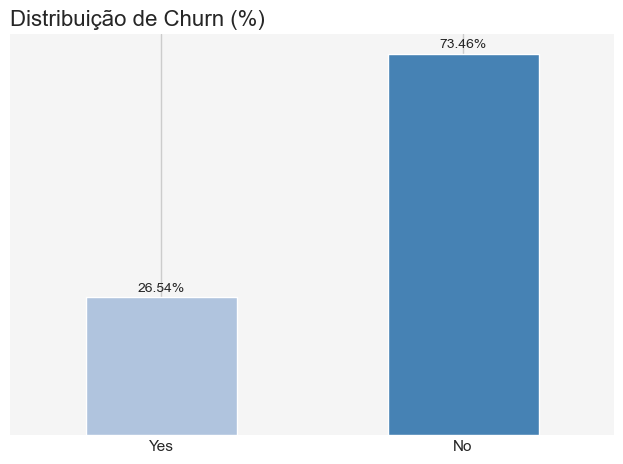

In [113]:
churn_count = df_churn['Churn'].value_counts(normalize=True).sort_index()
churn_count = churn_count.loc[['Yes', 'No']]
colors = ['lightsteelblue', 'steelblue']

ax = churn_count.plot(kind='bar', color=colors, rot=0)
ax.set_facecolor('whitesmoke')
ax.set_title('Distribui√ß√£o de Churn (%)', loc='left', fontsize=16)
ax.set_xlabel('')
ax.set_yticks([])
ax.tick_params(axis='x', length=0)

for i, valor in  enumerate(churn_count):
    percent = f"{valor*100:.2f}%"
    ax.text(i, valor+ 0.01, percent, ha='center', fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('grafico_distribuicao_churn.png', dpi=300, bbox_inches='tight')
plt.show()

In [58]:
num_churn = df_churn[df_churn['Churn'] == 'Yes'].shape[0]
total = df_churn.shape[0]
churn_rate = (num_churn/total) * 100

print(f"Taxa de Churn: {churn_rate:.2f}%")

Taxa de Churn: 26.54%


##### A taxa de churn identificada na base de dados √© de **26,54%**, o que indica que **aproximadamente 1 em cada 4 clientes cancela o servi√ßo**.

##### Em contrapartida, **73,46% dos clientes permanecem ativos**.

##### Essa propor√ß√£o demonstra uma **base majoritariamente fiel**, mas com um n√≠vel de evas√£o consider√°vel ‚Äî o suficiente para justificar uma investiga√ß√£o aprofundada sobre **quais perfis est√£o mais propensos a abandonar o servi√ßo**.


#### Compara√ß√£o de perfil dos clientes.
##### Abaixo, apresentamos a m√©dia de tr√™s vari√°veis num√©ricas para os dois grupos (`Churn = No` e `Churn = Yes`):

In [32]:
(df_churn.groupby('Churn')[['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total']].mean()).round(2)

customer_tenure  account_Charges.Monthly  account_Charges.Total
Churn                                                                 
No               37.57                    61.27                2549.91
Yes              17.98                    74.44                1531.80

#### Interpreta√ß√£o:

##### - **Tempo de perman√™ncia:** clientes que cancelam tendem a sair **bem antes** (em m√©dia, ap√≥s ~18 meses), enquanto os que permanecem j√° est√£o em m√©dia h√° mais de 3 anos com a empresa.
##### - **Mensalidade:** os clientes que cancelam pagam **valores mensais mais altos**, o que pode indicar **expectativas maiores em rela√ß√£o √† qualidade do servi√ßo**.
##### - **Total acumulado:** apesar da mensalidade ser mais alta, clientes que cancelam **pagaram menos no total**, justamente porque ficaram menos tempo na empresa.

##### Esses dados sugerem que o churn est√° mais associado a **clientes recentes e com contratos de maior valor**, o que levanta hip√≥teses sobre **insatisfa√ß√£o inicial ou dificuldade de reten√ß√£o nos primeiros meses**.


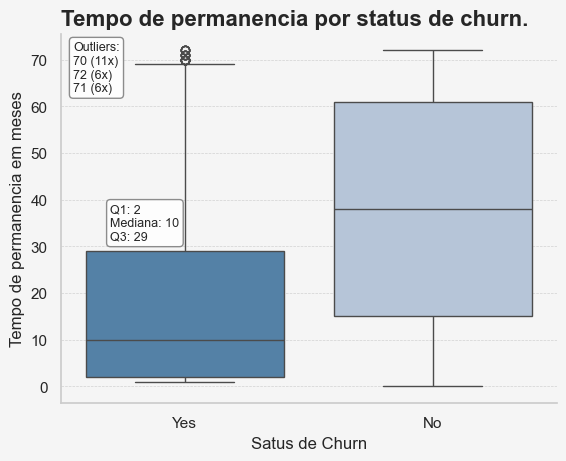

In [114]:
sns.set(style= 'whitegrid')
order = ['Yes', 'No']

ax = sns.boxplot(
    x = 'Churn',
    y = 'customer_tenure',
    hue='Churn',
    data = df_churn,
    order = order,
    palette = {'No': 'lightsteelblue', 'Yes': 'steelblue'},
    legend=False
)

ax.set_facecolor('whitesmoke')
ax.figure.set_facecolor('whitesmoke')
sns.despine(top=True, right=True)
plt.title('Tempo de permanencia por status de churn.', fontsize=16, loc='left', weight='bold')
ax.set_xlabel('Satus de Churn')
ax.set_ylabel('Tempo de permanencia em meses')

yes_data = df_churn[df_churn['Churn']== 'Yes']['customer_tenure']

q1 = np.percentile(yes_data, 25)
q2 = np.percentile(yes_data, 50)
q3 = np.percentile(yes_data, 75)
iqr = q3 - q1 #intervalo interquartil
outliers = yes_data[(yes_data < q1 - 1.5 * iqr) | (yes_data > q3 + 1.5 * iqr)]


x_pos = 0 

annotation_text = f"Q1: {q1:.0f}\nMediana: {q2:.0f}\nQ3: {q3:.0f}"
ax.annotate(
    annotation_text,
    xy= (x_pos, q3 + 5),
    xytext= (x_pos - 0.3, q3 + 6),
    textcoords = 'data',
    bbox = dict(boxstyle='round, pad=0.3', fc='white', ec='gray', alpha=0.9),
    fontsize=9,
    ha='left',
    va='center'
    )

outliers_counts = outliers.value_counts()
outlier_text = f"Outliers:\n" + "\n".join([f"{val:.0f} ({count}x)" for val, count in outliers_counts.items()])
ax.annotate(
    outlier_text,
    xy=(x_pos, outliers.max()),
    xytext=(x_pos - 0.45, outliers.max() + 2),
    textcoords='data',
    bbox=dict(boxstyle='round, pad=0.3', fc='white', ec='gray', alpha=0.9),
    fontsize=9,
    ha='left',
    va='top'
)

ax.yaxis.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.3)
plt.savefig('grafico_permanencia_por_Churn.png', dpi=300, bbox_inches='tight')
plt.show()

#### Tempo de perman√™ncia X Churn

##### O gr√°fico acima mostra a distribui√ß√£o do tempo de perman√™ncia dos clientes (`customer_tenure`) em rela√ß√£o ao churn.

##### **Principais observa√ß√µes:**

##### - A **mediana de perman√™ncia dos clientes que cancelam (`Yes`) √© de apenas 10 meses**, enquanto para os que permanecem (`No`) √© de 38 meses aproximadamente.
##### - A dispers√£o dos clientes que permanecem √© maior, com muitos deles ficando acima de 60 meses.
##### - O grupo de churn apresenta **v√°rios outliers pr√≥ximos ao limite superior (70, 71, 72 meses)** ‚Äî sugerindo que uma pequena parte dos clientes antigos tamb√©m decide sair.
##### - A **distribui√ß√£o assim√©trica** e o grande n√∫mero de valores baixos para churn indicam que **a maior parte dos cancelamentos acontece nos primeiros meses de contrato**.

##### **Conclus√£o:** h√° uma clara rela√ß√£o entre **tempo curto de perman√™ncia** e **maior probabilidade de churn**. Isso refor√ßa a import√¢ncia de a√ß√µes de reten√ß√£o logo nos primeiros meses ap√≥s a ades√£o do cliente.


In [34]:
contract = (pd.crosstab(df_churn['account_Contract'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)

contract

Churn               No   Yes
account_Contract            
Month-to-month    2220  1655
One year          1307   166
Two year          1647    48

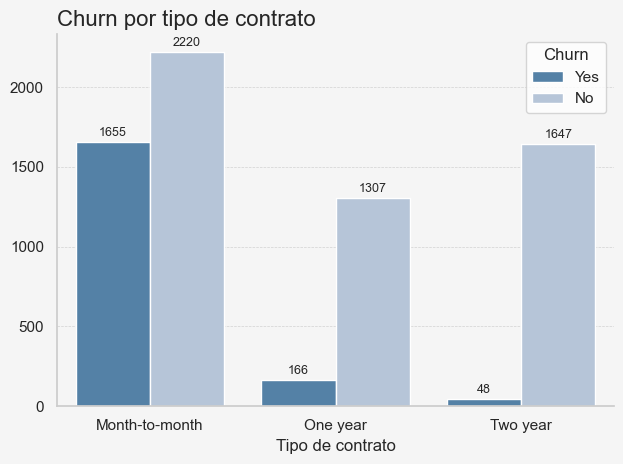

In [115]:
order = (df_churn[df_churn['Churn'] == 'Yes']
         ['account_Contract'].value_counts()
         .sort_values(ascending=False).index)

palette = {'Yes': 'steelblue', 'No': 'lightsteelblue'}

ax = sns.countplot(
    x='account_Contract',
    hue='Churn',
    data=df_churn,
    palette=palette,
    hue_order=['Yes', 'No'],
    order=order
)

ax.set_facecolor('whitesmoke')
ax.figure.set_facecolor('whitesmoke')
ax.set_ylabel('')
ax.set_xlabel('Tipo de contrato', fontsize=12)
plt.title('Churn por tipo de contrato', loc='left', fontsize=16)
sns.despine(top=True, right=True)



for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=9)

ax.yaxis.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.savefig('grafico_churn_tipo_contrato.png', dpi=300, bbox_inches='tight')
plt.show()


#### Rela√ß√£o entre tipo de contrato e churn

##### O gr√°fico acima mostra a distribui√ß√£o de cancelamentos (`Churn`) em rela√ß√£o ao tipo de contrato firmado com a empresa:

##### **Principais observa√ß√µes:**

##### - A **grande maioria dos cancelamentos ocorre entre clientes com contrato mensal** (`Month-to-month`), representando cerca de **92% dos casos de churn**.
##### - Os clientes com contratos de **1 ano ou 2 anos** apresentam **√≠ndices muito menores de evas√£o**.
##### - O n√∫mero de clientes que permanecem cresce proporcionalmente com a dura√ß√£o do contrato, o que sugere **um efeito de fideliza√ß√£o**.

#####  **Conclus√£o:** clientes que optam por contratos mais longos est√£o muito menos propensos a cancelar. Isso pode indicar:
##### - Maior comprometimento com o servi√ßo
##### - Descontos ou benef√≠cios em contratos longos
##### - Poss√≠vel perfil de cliente mais est√°vel e satisfeito

##### **Insight de neg√≥cio:** a empresa pode considerar **incentivar a migra√ß√£o para contratos anuais ou bienais**, especialmente para novos clientes, como forma de reduzir o churn.


#### Rela√ß√£o entre m√©todo de pagamento e churn

In [36]:
pay_method = (pd.crosstab(df_churn['account_PaymentMethod'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)

pay_method

Churn                        No   Yes
account_PaymentMethod                
Electronic check           1294  1071
Mailed check               1304   308
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232

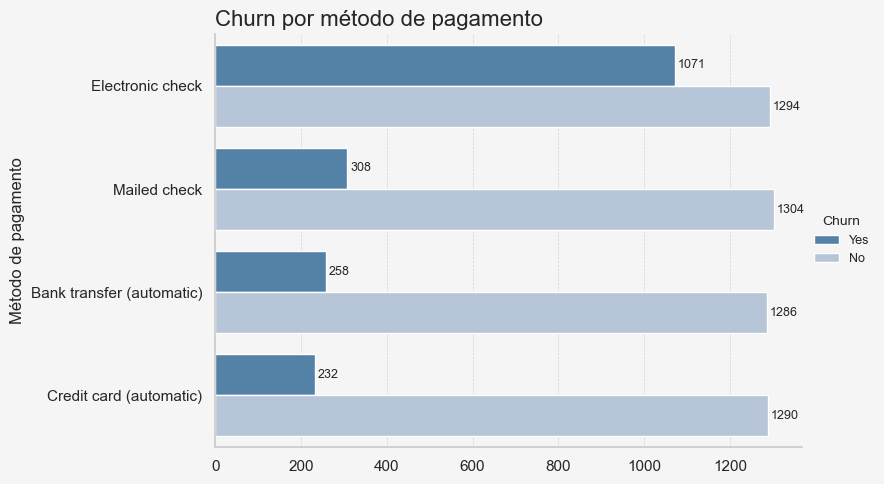

In [116]:
order = (
    df_churn[df_churn['Churn'] == 'Yes']
    ['account_PaymentMethod']
    .value_counts()
    .sort_values(ascending=False)
    .index
)

palette = {'Yes': 'steelblue', 'No': 'lightsteelblue'}

fig, ax = plt.subplots(figsize=(9,5))

ax = sns.countplot(
    y='account_PaymentMethod',
    hue='Churn',
    data=df_churn,
    palette=palette,
    hue_order=['Yes', 'No'],
    order=order,
    ax=ax
)

ax.set_facecolor('whitesmoke')
ax.figure.set_facecolor('whitesmoke')
ax.set_ylabel('M√©todo de pagamento', fontsize=12)
ax.set_xlabel('')
plt.title('Churn por m√©todo de pagamento', loc='left', fontsize=16)
sns.despine(top=True, right=True)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=9)

ax.legend(title='Churn',
          loc='center left',
          bbox_to_anchor=(1.0,0.5),
          frameon=False,
          fontsize=9,
          title_fontsize=10
          )

ax.xaxis.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.savefig('grafico_churn_metodo_pagamento.png', dpi=300, bbox_inches='tight')
plt.show()


##### O gr√°fico acima mostra a distribui√ß√£o dos clientes de acordo com o m√©todo de pagamento utilizado e o status de churn:
##### **Observa√ß√µes:**

##### - O m√©todo **‚ÄúElectronic check‚Äù** concentra **mais de 40% de todos os cancelamentos**.
##### - Os m√©todos **autom√°ticos** (cart√£o de cr√©dito e transfer√™ncia banc√°ria) apresentam **baixas taxas absolutas de churn**, mesmo com n√∫mero similar de clientes.
##### - **Pagamentos manuais** (como `Electronic check` e `Mailed check`) est√£o mais associados ao cancelamento.

##### **Conclus√£o:** h√° uma **correla√ß√£o negativa entre churn e o uso de m√©todos de pagamento autom√°ticos** ‚Äî ou seja, quem adere a pagamentos autom√°ticos tende a **permanecer mais tempo com a empresa**.

##### **Insight de neg√≥cio:** incentivar o uso de m√©todos autom√°ticos (com descontos, brindes ou campanhas educativas) pode ajudar a **reduzir a evas√£o**.


In [117]:
internet_serv = (pd.crosstab(df_churn['internet_InternetService'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)

internet_serv['Total']= internet_serv['Yes'] + internet_serv['No']

internet_serv['Churn Rate (%)'] = (internet_serv['Yes']/internet_serv['Total'] * 100).round(2)

internet_serv

Churn                       No   Yes  Total  Churn Rate (%)
internet_InternetService                                   
Fiber optic               1799  1297   3096           41.89
DSL                       1962   459   2421           18.96
No                        1413   113   1526            7.40

#### Rela√ß√£o entre tipo de servi√ßo de internet e churn

##### A princ√≠pio, o servi√ßo de `Fiber optic` aparenta concentrar a maior parte dos cancelamentos. No entanto, como esse tamb√©m √© o servi√ßo com o maior n√∫mero total de clientes, √© importante analisar a **taxa de churn proporcional** por tipo de servi√ßo:
##### **Observa√ß√µes:**

##### - Clientes com **servi√ßo de fibra √≥ptica** apresentam **a maior taxa de churn proporcional**, mesmo sendo maioria.
##### - J√° os clientes com DSL ou sem internet t√™m taxas de cancelamento significativamente mais baixas.
##### - Isso pode indicar que, apesar da superioridade t√©cnica da fibra, algo na **experi√™ncia percebida**, **atendimento** ou **precifica√ß√£o** est√° gerando insatisfa√ß√£o nesse grupo.

##### **Conclus√£o:** o tipo de servi√ßo est√° sim relacionado ao churn, mas √© necess√°rio analisar **proporcionalmente** para evitar distor√ß√µes. A **fibra √≥ptica, apesar de moderna, parece concentrar o maior risco de perda de clientes**.

##### **Pr√≥ximo passo poss√≠vel:** investigar se clientes com fibra tamb√©m possuem mensalidades mais altas ou se concentram em planos mensais.


In [121]:
# Filtrando apenas os clientes que t√™m fibra √≥ptica e est√£o em churn
fiber_churn = df_churn[
    (df_churn['internet_InternetService'] == 'Fiber optic') & 
    (df_churn['Churn'] == 'Yes')
]

# Cruzamento entre tipo de contrato e contagem de clientes em churn com fibra
fiber_contract = fiber_churn['account_Contract'].value_counts()

# Calculando a m√©dia da mensalidade desses clientes
fiber_monthly_avg = fiber_churn['account_Charges.Monthly'].mean()

# Exibindo os resultados
print("Contagem por tipo de contrato (clientes de fibra √≥ptica em churn):")
print(fiber_contract)

print(f"\nMensalidade m√©dia (clientes de fibra √≥ptica em churn): $ {fiber_monthly_avg:.2f}")


Contagem por tipo de contrato (clientes de fibra √≥ptica em churn):
account_Contract
Month-to-month    1162
One year           104
Two year            31
Name: count, dtype: int64

Mensalidade m√©dia (clientes de fibra √≥ptica em churn): $ 88.13


#### An√°lise do churn entre clientes com servi√ßo de fibra √≥ptica

##### Dentre os clientes que cancelaram e utilizavam o servi√ßo de internet por fibra √≥ptica:

##### - **89,6% estavam em contratos mensais**
##### - A **mensalidade m√©dia foi de 88,13**, acima da m√©dia geral de churn ($ 74,44)

##### Esses dados indicam que **clientes com contratos mais curtos e custos mais altos** formam o grupo com **maior risco de cancelamento**.

##### **Insight estrat√©gico:** revisar os benef√≠cios percebidos nos planos de fibra com mensalidade elevada pode ser essencial para **reduzir a evas√£o nesse p√∫blico-alvo**.


#### An√°lise de rela√ß√£o entre servi√ßos extras de internet e Churn.

In [122]:
internet_sec = (pd.crosstab(df_churn['internet_OnlineSecurity'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)
internet_sec['Total'] = internet_sec['Yes'] + internet_sec['No']

# Calculando taxa de churn (%)
internet_sec['Churn_rate (%)'] = (internet_sec['Yes'] / internet_sec['Total'] * 100).round(2)

internet_sec

Churn                      No   Yes  Total  Churn_rate (%)
internet_OnlineSecurity                                   
No                       3450  1574   5024           31.33
Yes                      1724   295   2019           14.61

In [123]:
internet_bac = (pd.crosstab(df_churn['internet_OnlineBackup'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)
internet_bac['Total'] = internet_bac['Yes'] + internet_bac['No']

# Calculando taxa de churn (%)
internet_bac['Churn_rate (%)'] = (internet_bac['Yes'] / internet_bac['Total'] * 100).round(2)
internet_bac

Churn                    No   Yes  Total  Churn_rate (%)
internet_OnlineBackup                                   
No                     3268  1346   4614           29.17
Yes                    1906   523   2429           21.53

In [124]:
internet_prot = (pd.crosstab(df_churn['internet_DeviceProtection'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)
internet_prot['Total'] = internet_prot['Yes'] + internet_prot['No']

# Calculando taxa de churn (%)
internet_prot['Churn_rate (%)'] = (internet_prot['Yes'] / internet_prot['Total'] * 100).round(2)
internet_prot

Churn                        No   Yes  Total  Churn_rate (%)
internet_DeviceProtection                                   
No                         3297  1324   4621           28.65
Yes                        1877   545   2422           22.50

In [126]:
internet_sup = (pd.crosstab(df_churn['internet_TechSupport'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)
internet_sup['Total'] = internet_sup['Yes'] + internet_sup['No']

# Calculando taxa de churn (%)
internet_sup['Churn_rate (%)'] = (internet_sup['Yes'] / internet_sup['Total'] * 100).round(2)
internet_sup

Churn                   No   Yes  Total  Churn_rate (%)
internet_TechSupport                                   
No                    3440  1559   4999           31.19
Yes                   1734   310   2044           15.17

In [125]:
#		
internet_tv = (pd.crosstab(df_churn['internet_StreamingTV'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)
internet_tv['Total'] = internet_tv['Yes'] + internet_tv['No']

# Calculando taxa de churn (%)
internet_tv['Churn_rate (%)'] = (internet_tv['Yes'] / internet_tv['Total'] * 100).round(2)
internet_tv

Churn                   No   Yes  Total  Churn_rate (%)
internet_StreamingTV                                   
No                    3281  1055   4336           24.33
Yes                   1893   814   2707           30.07

In [127]:
internet_mov = (pd.crosstab(df_churn['internet_StreamingMovies'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)
internet_mov['Total'] = internet_mov['Yes'] + internet_mov['No']

# Calculando taxa de churn (%)
internet_mov['Churn_rate (%)'] = (internet_mov['Yes'] / internet_mov['Total'] * 100).round(2)
internet_mov

Churn                       No   Yes  Total  Churn_rate (%)
internet_StreamingMovies                                   
No                        3260  1051   4311           24.38
Yes                       1914   818   2732           29.94

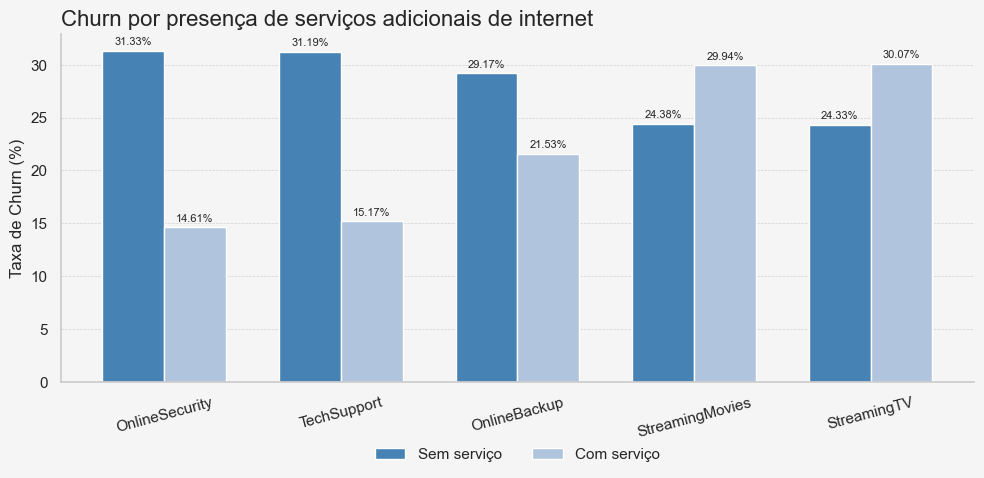

In [137]:
services = ['OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies']
serv_no = [31.33, 29.17, 31.19, 24.33, 24.38]
serv_yes = [14.61, 21.53, 15.17, 30.07, 29.94]

order = np.argsort(-np.array(serv_no))  # ordena do maior para o menor
services_ord = [services[i] for i in order]
serv_no_ord = [serv_no[i] for i in order]
serv_yes_ord = [serv_yes[i] for i in order]

x = np.arange(len(services))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, serv_no_ord, width, label='Sem servi√ßo', color='steelblue')
bars2 = ax.bar(x + width/2, serv_yes_ord, width, label='Com servi√ßo', color='lightsteelblue')

ax.set_facecolor('whitesmoke')
ax.figure.set_facecolor('whitesmoke')
ax.set_ylabel('Taxa de Churn (%)')
ax.set_title('Churn por presen√ßa de servi√ßos adicionais de internet', loc='left', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(services_ord, rotation=15)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
sns.despine(top=True, right=True)

# R√≥tulos nas barras
for bars in [bars1, bars2]:
    ax.bar_label(bars, fmt='%.2f%%', fontsize=8, padding=3)

ax.yaxis.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.3)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig('grafico_churn_servicos_internet.png', dpi=300, bbox_inches='tight')
plt.show()

#### Rela√ß√£o entre servi√ßos adicionais de internet e churn

##### Abaixo est√£o os dados de cancelamento (`Churn`) cruzados com o uso de servi√ßos adicionais de internet:

| Presen√ßa do Servi√ßo | OnlineSecurity | OnlineBackup | TechSupport | StreamingTV | StreamingMovies |
|---------------------|----------------|--------------|-------------|-------------|-----------------|
| **N√£o**             | 31.33%         | 29.17%       | 31.19%      | 24.33%      | 24.38%          |
| **Sim**             | 14.61%         | 21.53%       | 15.17%      | 30.07%      | 29.94%          |

#### Observa√ß√µes:

##### - Em **todos os casos**, os clientes que **n√£o utilizam** esses servi√ßos est√£o **muito mais presentes entre os que cancelam**.

##### Por√©m a tabela mostra que a presen√ßa de alguns servi√ßos est√° fortemente associada √† **redu√ß√£o da taxa de churn**, enquanto outros parecem n√£o ter efeito relevante.

##### **Principais destaques:**

##### - **OnlineSecurity** e **TechSupport** s√£o os servi√ßos com maior impacto positivo ‚Äî as taxas de churn **mais de 50% menores** dentre clientes que os utilizam.
##### - **OnlineBackup** tamb√©m reduz o churn, por√©m de forma mais modesta.
##### - Por outro lado, a presen√ßa de **StreamingTV** e **StreamingMovies** **n√£o reduz a taxa de churn** ‚Äî na verdade, a taxa entre quem usa esses servi√ßos √© ligeiramente **maior** do que entre os que n√£o utilizam.

##### **Conclus√£o:** servi√ßos que entregam **valor direto e percept√≠vel em seguran√ßa e suporte** parecem contribuir para a reten√ß√£o do cliente, enquanto servi√ßos de entretenimento **n√£o funcionam como diferencial competitivo** neste caso.

##### **Insight estrat√©gico:** Investir em campanhas que incentivem a ades√£o a servi√ßos como **OnlineSecurity** e **TechSupport**, especialmente para clientes com contratos curtos e mensalidades altas, pode ser uma a√ß√£o de impacto direto na **redu√ß√£o do churn**.

#### Rela√ß√£o entre Linha Telef√¥nica, Idade e Churn

In [44]:
phone = (pd.crosstab(df_churn['phone_PhoneService'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)

phone

Churn                 No   Yes
phone_PhoneService            
Yes                 4662  1699
No                   512   170

In [45]:
seniors = df[df['customer_SeniorCitizen'] == 1]

phone_percent = (seniors['phone_PhoneService'].value_counts(normalize=True).get('Yes', 0)) * 100
print(f"Percentual de seniors com linha telefonica: {phone_percent:.2f}%")

Percentual de seniors com linha telefonica: 90.89%


In [46]:
seniors = df[df['customer_SeniorCitizen'] == 1]

phone_percent = (seniors['Churn'].value_counts(normalize=True).get('Yes', 0)) * 100
print(f"Percentual de seniors que cancelaram seus planos: {phone_percent:.2f}%")

Percentual de seniors que cancelaram seus planos: 41.68%


##### A grande maioria dos clientes possui linha telef√¥nica:

| Possui linha telef√¥nica | Churn: N√£o | Churn: Sim |
|-------------------------|------------|------------|
| Sim                     | 4.662      | 1.699      |
| N√£o                     | 512        | 170        |

##### **A posse de linha telef√¥nica √© amplamente difundida**, o que limita seu poder explicativo direto sobre o churn.

##### Entretanto, cruzando com a informa√ß√£o de **idade (clientes idosos/seniors)**, observa-se que:

##### - **90.89%** dos seniors possuem linha telef√¥nica.
##### - **41.68%** dos seniors cancelaram seus planos (**churn elevado**).

##### Isso sugere que, **embora a posse da linha telef√¥nica seja alta entre os seniors**, **ela n√£o impede o cancelamento**. Outros fatores como **tempo de perman√™ncia** e **valores cobrados mensalmente** continuam sendo mais determinantes.


### Conclus√£o da An√°lise

##### A an√°lise explorat√≥ria revelou um cen√°rio importante sobre a evas√£o de clientes na empresa Telecom X. A taxa de churn identificada na base √© de **26,54%**, o que indica que mais de 1 em cada 4 clientes rescindem seu contrato.

##### A perman√™ncia m√©dia entre os clientes que cancelam √© de **aproximadamente 18 meses**, com **mediana de apenas 10 meses**, evidenciando uma **concentra√ß√£o de cancelamentos nos primeiros meses de contrato**. Essa distribui√ß√£o assim√©trica sugere que **o risco de churn √© mais elevado no in√≠cio da jornada do cliente**, o que refor√ßa a import√¢ncia de a√ß√µes de engajamento precoce.

##### Al√©m disso, identificou-se que os clientes que cancelam pagam **valores mensais mais altos** em m√©dia ($ 74,44), e que **92% dos cancelamentos ocorrem entre clientes com contratos mensais** ‚Äî o tipo de contrato com menor fideliza√ß√£o. Essa tend√™ncia se refor√ßa ao observar que **m√©todos de pagamento manuais** (como `Electronic check` e `Mailed check`) tamb√©m est√£o mais associados ao churn.

##### Outro ponto de aten√ß√£o envolve os clientes com planos de **fibra √≥ptica**, que concentram grande parte dos cancelamentos, especialmente quando associados a **contratos mensais e mensalidades elevadas**. Isso aponta para uma poss√≠vel **inadequa√ß√£o entre o valor percebido e o valor cobrado** nesses planos.

##### A an√°lise dos servi√ßos adicionais trouxe insights valiosos: clientes com **servi√ßos de seguran√ßa e suporte t√©cnico (OnlineSecurity e TechSupport)** apresentam taxas de churn **mais de 50% menores**, enquanto a presen√ßa de servi√ßos de entretenimento como **StreamingTV** e **StreamingMovies** **n√£o contribui para a reten√ß√£o**. Esses dados sugerem que **benef√≠cios funcionais e de suporte** s√£o mais relevantes para fidelizar o cliente do que ofertas de entretenimento.

---

#### üìå Recomenda√ß√µes:

##### - **Focar nos primeiros meses** da jornada do cliente com a√ß√µes de engajamento e acompanhamento.
##### - **Incentivar contratos mais longos e formas de pagamento autom√°ticas**, oferecendo vantagens claras.
##### - **Reavaliar a proposta de valor dos planos com fibra √≥ptica e mensalidades elevadas**, especialmente para o p√∫blico com maior taxa de cancelamento.
##### - **Incluir ou refor√ßar servi√ßos de seguran√ßa e suporte t√©cnico** nos pacotes oferecidos ‚Äî eles mostram correla√ß√£o com maior reten√ß√£o.

---

##### Esta an√°lise fornece uma base s√≥lida para a√ß√µes de marketing, reten√ß√£o e revis√£o estrat√©gica dos planos e servi√ßos da empresa. O pr√≥ximo passo pode envolver **modelagem preditiva de churn**, utilizando essas vari√°veis para antecipar o comportamento do cliente e atuar de forma proativa.
